## Create DataFrame for google sheet

In [20]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from collections import defaultdict

import seaborn as sns


In [2]:
sheetID = "1LTY0AYA_X6X4y5DCLwmHv5HndoFHyLJ5g_9386xVYD8"
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheetID}/export?format=csv")
df = pd.DataFrame(df)

df.drop(df.columns[0], axis=1, inplace=True) #first columns is duplicate created when creating the original DataFrame
print(df)

#https://docs.google.com/spreadsheets/d/1LTY0AYA_X6X4y5DCLwmHv5HndoFHyLJ5g_9386xVYD8/edit?usp=sharing

     steps  rewards   done                                           topology  \
0        1       -2  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
1        2       -3  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
2        3       -4  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
3        4       -5  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
4        5       -6  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
..     ...      ...    ...                                                ...   
620    621     -713  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
621    622     -716  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
622    623     -717  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
623    624     -718  False  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   
624    625     -619   True  [  0.   1.   0.   0.   0.   1.   0.   0.   0. ...   

                           

In [3]:
df.head()

,steps,rewards,done,topology,actions,action_num_val
0,1,-2,False,[ 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 1. 0. 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1.\n 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1. 1. 0.\n 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}",69
1,2,-3,False,[ 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 1. 0. 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1.\n 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1. 1. 0.\n 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}",68
2,3,-4,False,[ 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 1. 0. 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1.\n 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1. 1. 0.\n 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}",71
3,4,-5,False,[ 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 1. 0. 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1.\n 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1. 1. 0.\n 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}",8
4,5,-6,False,[ 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 1. 0. 0. 0. 0. 0. 0. 0. 100. 0. 0. 1. 0. 1.\n 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.\n 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.\n 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.\n 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n 0. 1. 0. 1. 

In [4]:
#to fix some casting issues when making figures
df["steps"] = df["steps"].astype("int")
df["actions"] = df["actions"].astype("string")

#create another dataframe for correlation use
df2 = pd.DataFrame(df.actions, df.action_num_val)

In [5]:
df["steps"] = df["steps"].astype("int")
df["actions"] = df["actions"].astype("string")
df2 = pd.DataFrame(df.actions, df.action_num_val)

fig = px.line(df,x="steps", y="rewards")
fig.show()


There is no correlation between action_num_val and the rewards. This makes sense as this is a random agent doing random actions. In the bruteforce agent the values iterate starting at one and incrementing action_num_val until it is completed. 

In [6]:
fig2 = px.scatter(df,x="steps", y="rewards", color="action_num_val")
fig.update_traces(marker_size=10)
fig2.show()

### Numpy correlation

__Strong Correlation:__

- Rewards vs Step

__Weak Corelation:__
- Rewards vs action_num_val
- Rewards vs Done

In [7]:
df_corr = df.corr()
fig_corr = go.Figure()
fig_corr.add_trace(
    go.Heatmap(
        x=df_corr.columns,
        y=df_corr.index,
        z=np.array(df_corr)
    )
)
print(df_corr)
fig_corr.show()

                   steps   rewards      done  action_num_val
steps           1.000000 -0.992683  0.069227       -0.020753
rewards        -0.992683  1.000000 -0.052854        0.025139
done            0.069227 -0.052854  1.000000        0.063429
action_num_val -0.020753  0.025139  0.063429        1.000000


In [8]:
df2.head()



,actions
action_num_val,
69,"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}"
68,"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}"
71,"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}"
8,"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}"
66,"{'success': False, 'value': 0.0, 'services': {}, 'os': {}, 'processes': {}, 'access': {}, 'discovered': {}, 'connection_error': True, 'permission_error': False, 'newly_discovered': {}}"


- Tried searching up how to create a correlation between a string and a number (actions and action_num_val respectively) and got this. 

- The output displays parts within the action. I believe it is just displaying the correlation between the host and the action_num_val

In [9]:
correlation = df2.actions.str.get_dummies(sep=" ").corrwith(df.action_num_val)
print(correlation)

'access':                   NaN
'connection_error':         NaN
'daclsvc':            -0.181823
'discovered':               NaN
'ftp':                -0.271831
'http':               -0.271831
'newly_discovered':         NaN
'os':                       NaN
'permission_error':         NaN
'processes':                NaN
'services':                 NaN
'value':                    NaN
'windows':            -0.271831
0,                    -0.525861
0.0,                   0.389684
0.0},                 -0.330031
1,                    -0.271831
1.0,                  -0.271831
1.0},                 -0.271831
False,                      NaN
True,                  0.389684
{'linux':             -0.271831
{'ssh':               -0.271831
{'success':                 NaN
{'tomcat':            -0.181823
{},                         NaN
{}}                         NaN
dtype: float64


## Managed to get the actions in a more expanded form
from the original dataFrame. DataFrame 2 is to analyze correlations between agent actions and agent_num_val


In [10]:
print(df2.actions.str.get_dummies(sep=" "))

df3 = df2.actions.str.get_dummies(sep=" ")
df3.head()
df3.to_csv("Bruteforce_actions.csv")

                'access':  'connection_error':  'daclsvc':  'discovered':  \
action_num_val                                                              
69                      1                    1           0              1   
68                      1                    1           0              1   
71                      1                    1           0              1   
8                       1                    1           0              1   
66                      1                    1           0              1   
...                   ...                  ...         ...            ...   
52                      1                    1           0              1   
58                      1                    1           0              1   
30                      1                    1           0              1   
63                      1                    1           0              1   
70                      1                    1           0              1   

## Other

In [21]:
corr2 = np.correlate(df.actions, df.action_num_val)
print("There is too much output to view if corr2 was allowed to print")

There is too much output to view if corr2 was allowed to print


In [22]:
corr3 = df3.corr()


# Correlations in df3

The yaml markdown notes complement this for analysis. 

The blank areas are where the correlation value resulted in: NaN

issue i just realized: this is correlation with itself :P 

<AxesSubplot:>

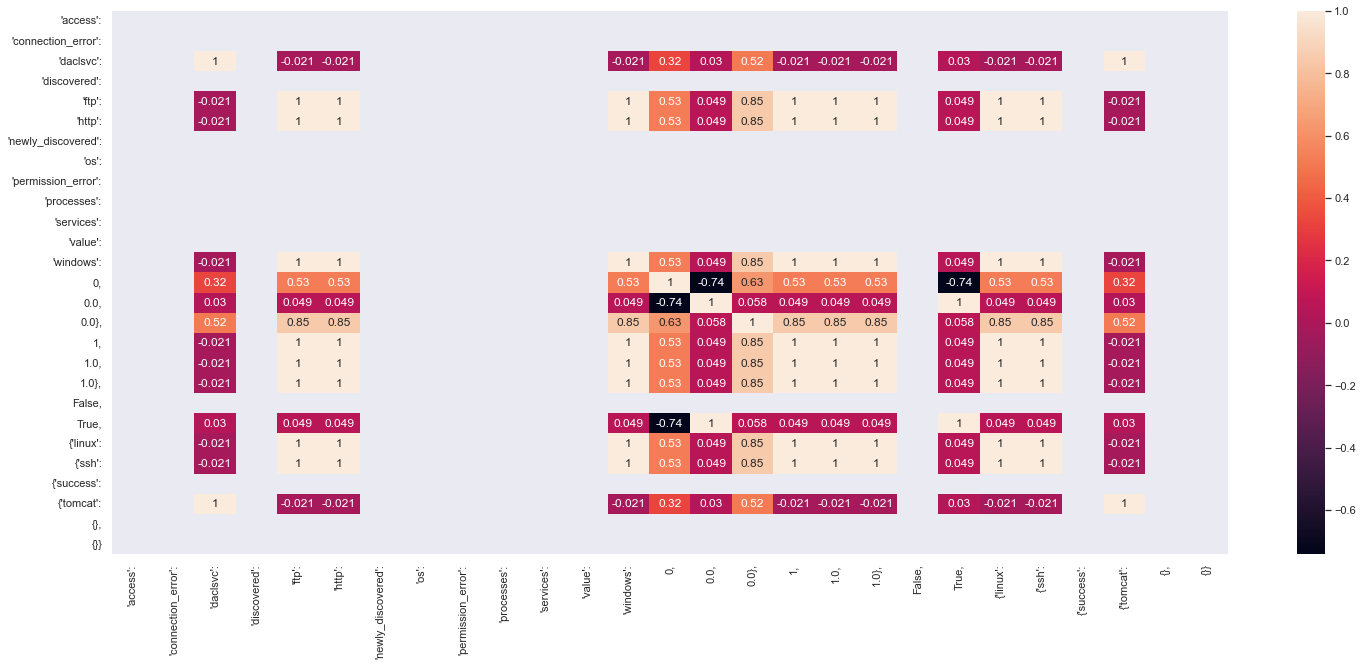

In [28]:
sns.set(rc={"figure.figsize":(25,10)})
sns.heatmap(corr3, xticklabels=corr3.columns, yticklabels=corr3.columns, annot=True)